In [ ]:
import numpy as np

f = lambda x: (x ** 3) - (9 * x) + 5

<Figure size 432x288 with 0 Axes>

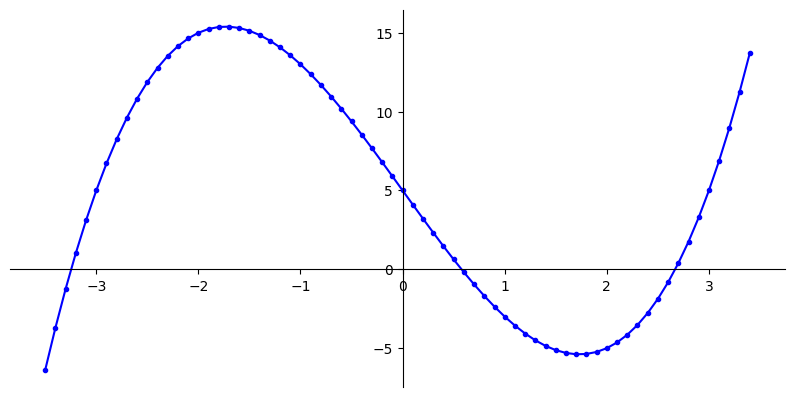

In [ ]:
import matplotlib.pyplot as plt


def desenha_funcao(f, intervalo=(-3.5, 3.5), step=0.1):
    plt.cla()
    plt.clf()
    plt.figure(figsize=(10,5), dpi=100)

    # Desenha plano cartesiano
    ax = plt.gca()
    ax.spines['top'].set_color('none')
    ax.spines['bottom'].set_position('zero')
    ax.spines['left'].set_position('zero')
    ax.spines['right'].set_color('none')

    # Define X e Y
    a, b = intervalo
    x = np.arange(a, b, step)
    y = [f(xi) for xi in x]

    # Traça gráfico da função
    plt.plot(x, y, 'b.', linestyle='-')

    plt.show()

desenha_funcao(f)

In [ ]:
def bisseccao(f, intervalo, precisao, iteracoes, decimal, print_output=True):
    a, b = intervalo

    if (b - a) < precisao:
        x = (a + b) / 2
        return round(x, decimal)

    k = 0

    M = f(a)
    M = round(M, decimal)

    if print_output:
        print("\t\t".join(['n', 'a', 'b', 'x', 'f(x)', 'f(a)']))

    while k < iteracoes:
        x = (a + b) / 2
        x = round(x, decimal)

        f_de_x = f(x)
        f_de_x = round(f_de_x, decimal)
        
        if print_output:
            print(k, a, b, x, f_de_x, round(f(a), decimal), sep='\t\t')

        if M * f_de_x > 0:
            a = x
        else:
            b = x

        if (b - a) < precisao:
            x = (a + b) / 2
            x = round(x, decimal)
        
            if print_output:
                print(k + 1, a, b, x, f_de_x, round(f(a), decimal), sep='\t\t')

            return x
        
        k = k + 1
    
    return round(x, decimal)

raiz = bisseccao(f, [0.5, 1], 0.01, 100, 4)
print(f"\nRaiz: {raiz}")

n		a		b		x		f(x)		f(a)
0		0.5		1		0.75		-1.3281		0.625
1		0.5		0.75		0.625		-0.3809		0.625
2		0.5		0.625		0.5625		0.1155		0.625
3		0.5625		0.625		0.5938		-0.1348		0.1155
4		0.5625		0.5938		0.5781		-0.0097		0.1155
5		0.5625		0.5781		0.5703		0.0528		0.1155
6		0.5703		0.5781		0.5742		0.0528		0.0528

Raiz: 0.5742


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log
  """Entry point for launching an IPython kernel.


<Figure size 432x288 with 0 Axes>

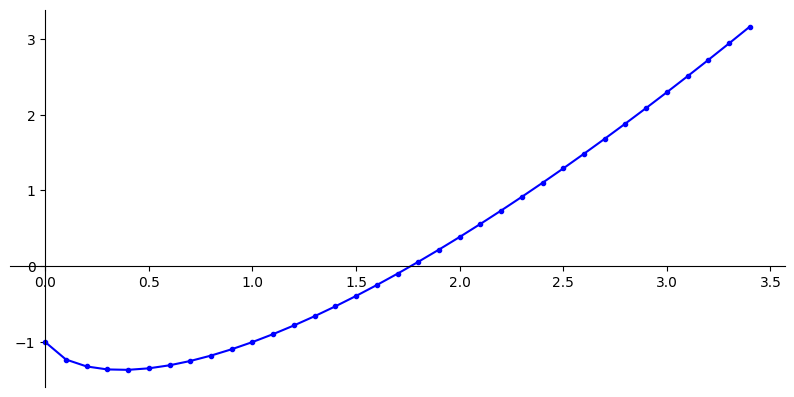

In [ ]:
g = lambda x: x * np.log(x) - 1

desenha_funcao(g)

In [ ]:
def falsa_posicao(f, intervalo, precisao, iteracoes, decimal, print_output=True):
    a, b = intervalo

    if (b - a) < precisao:
        x = (a + b) / 2
        return round(x, decimal)

    if abs(f(a)) < precisao or abs(f(b)) < precisao:
        print(f(b), f(a))
        return round(a, decimal)

    k = 0

    M = f(a)
    M = round(M, decimal)

    if print_output:
        print("\t\t".join(['n', 'a', 'b', 'x', 'f(x)', 'f(a)']))

    while k < iteracoes:
        x = (a * f(b) - b * f(a)) / (f(b) - f(a))
        x = round(x, decimal)

        f_de_x = f(x)
        f_de_x = round(f_de_x, decimal)
        
        if print_output:
            print(k, a, b, x, f_de_x, round(f(a), decimal), sep='\t\t')

        if abs(f_de_x) < precisao:
            return x
        
        if M * f_de_x > 0:
            a = x
        else:
            b = x

        if (b - a) < precisao:
            x = (a + b) / 2
            x = round(x, decimal)
            
            if print_output:
                print(k + 1, a, b, x, f_de_x, round(f(a), decimal), sep='\t\t')

            return x
        
        k = k + 1
    
    return round(x, decimal)
        
raiz = falsa_posicao(g, [2, 3], 0.0005, 100, 4)
print(f"\nRaiz: {raiz}")

n		a		b		x		f(x)		f(a)
0		2		3		1.7977		0.0544		0.3863
1		1.7977		3		1.7685		0.0083		0.0544
2		1.7685		3		1.764		0.0012		0.0083
3		1.764		3		1.7633		0.0001		0.0012

Raiz: 1.7633


In [ ]:
raiz = falsa_posicao(f, [0, 1], 0.0005, 100, 4)
print(f"\nRaiz: {raiz}")

n		a		b		x		f(x)		f(a)
0		0		1		0.625		-0.3809		5
1		0		0.625		0.5808		-0.0313		5
2		0		0.5808		0.5772		-0.0025		5
3		0		0.5772		0.5769		-0.0001		5

Raiz: 0.5769


In [ ]:
from sympy import *

x = Symbol('x')

h = x**3 - (9 * x) + 3

def newton_raphson(f, x0, precisao, iteracoes, decimal, print_output=True):
    x = Symbol('x')

    f_x = f.evalf(subs=({x: x0}))
    f_x = round(f_x, decimal)

    k = 0
   
    if abs(f_x) < precisao:
        x1 = x0
        return round(x1, decimal)

    derivada = f.diff()

    if print_output:
        print("\t\t".join(['n',  'x', 'f(x)', "f'(x)"]))
    
    while k < iteracoes:
        derivada_x = derivada.evalf(subs=({x: x0}))
        derivada_x = round(derivada_x, decimal)
        
        if print_output:
            print(f"{k}\t\t{x0}\t\t{f_x}\t\t{derivada_x}")

        x1 = x0 - (f.evalf(subs=({x: x0})) / derivada_x)
        x1 = round(x1, decimal)
        
        f_x = f.evalf(subs=({x: x1}))
        f_x = round(f_x, decimal)

        if abs(f_x) < precisao or abs(x1 - x0) < precisao:
            if print_output:
                print(f"{k}\t\t{x1}\t\t{f_x}\t\t--")

            return round(x1, decimal)

        x0 = x1
        k += 1
    
    return round(x1, decimal)

raiz = newton_raphson(h, 0.75, 0.01, 100, 4)
print(f"\nRaiz: {raiz}")

n		x		f(x)		f'(x)
0		0.75		-3.3281		-7.3125
1		0.2949		0.3716		-8.7391
1		0.3374		0.0018		--

Raiz: 0.3374


In [ ]:
f2 = lambda x: (x ** 3) - (9 * x) + 3

def secante(f, x0, x1, precisao, iteracoes, decimal, print_output=True):
    f_x = round(f(x0), decimal)

    k = 0

    if print_output:
        print("\t\t".join(['n',  'x', 'f(x)']))
        print(f"{k}\t\t{x0}\t\t{f_x}")
   
    if abs(f_x) < precisao:
        x = x0
        return round(x, decimal)

    f_x = round(f(x1), decimal)

    if abs(f_x) < precisao or abs(x1 - x0) < precisao:
        x = x1
        return round(x1, decimal)

    if print_output:
        print(f"{k + 1}\t\t{x1}\t\t{f_x}")
    
    while k < iteracoes:
        x = x1 - (f(x1) * (x1 - x0) / (f(x1) - f(x0))) 
        x = round(x, decimal)
        
        f_x = round(f(x), decimal)

        if print_output:
            print(f"{k + 2}\t\t{x}\t\t{f_x}")

        if abs(f_x) < precisao or abs(x - x1) < precisao:
            return round(x, decimal)

        x0 = x1
        x1 = x
        k += 1

    return round(x1, decimal)

raiz = secante(f2, 0, 1, 0.01, 100, 4)
print(f"\nRaiz: {raiz}")

n		x		f(x)
0		0		3
1		1		-5
2		0.375		-0.3223
3		0.3319		0.0495
4		0.3376		0.0001

Raiz: 0.3376


## Exercício 1

<Figure size 432x288 with 0 Axes>

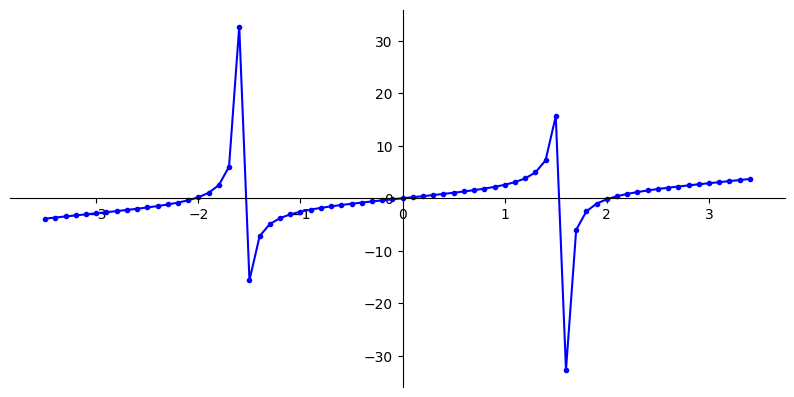

In [ ]:
import sympy

x = Symbol('x')

a = lambda x: x + np.tan(x)
a_s = x + sympy.tan(x)

desenha_funcao(a)

In [ ]:
intervalo_a = (1.6, 2.5)

print(f"a) {a_s}\n")

raiz = bisseccao(a, intervalo_a, 0.0001, 100, 4, False)
print(f"Bissecção: {raiz}")
raiz = falsa_posicao(a, intervalo_a, 0.0001, 100, 4, False)
print(f"Falsa posição: {raiz}")
raiz = secante(a, 1.6, 2.5, 0.0001, 100, 4, False)
print(f"Secante: {raiz}")

a) x + tan(x)

Bissecção: 2.0288
Falsa posição: 2.0293
Secante: 2.0288


A função utilizada em **a)** não é contínua, apesar disso não ser aparente no gráfico gerado pela biblioteca `matplotlib` que conecta todos os pontos com uma linha. Foi considerado o intervalo 1,6 à 2,5 como intervalo para obter a menor raíz positiva da função, que tem um valor aproximado de 2,02.

<Figure size 432x288 with 0 Axes>

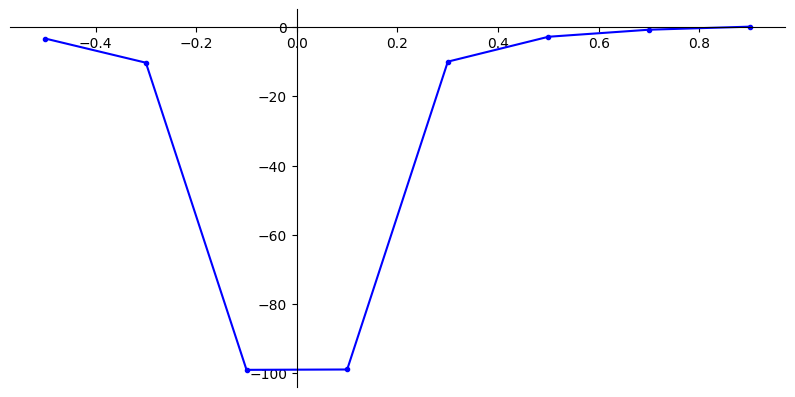

In [ ]:
x = Symbol('x')

b = lambda x: ((x + 1) ** (1 / 2)) - (x ** -2)
b_s = ((x + 1) ** (1 / 2)) - (x ** -2)

desenha_funcao(b, (-0.5, 1), 0.2)

In [ ]:
intervalo_b = (0.6, 1)

print(f"b) {b_s}\n")

raiz = bisseccao(b, intervalo_b, 0.0001, 100, 4, False)
print(f"Bissecção: {raiz}")
raiz = falsa_posicao(b, intervalo_b, 0.0001, 100, 4, False)
print(f"Falsa posição: {raiz}")
raiz = secante(b, 1.6, 2.5, 0.0001, 100, 4, False)
print(f"Secante: {raiz}")

b) (x + 1)**0.5 - 1/x**2

Bissecção: 0.8567
Falsa posição: 0.8567
Secante: 0.8567


Na função utilizada na letra **b)**, nós obtivemos um mesmo valor como menor raíz positiva da função, que é igual a 0,8567, assumindo um intervalo de (0,6 e 1) para o método da Bicecção e da Falsa Posição.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


<Figure size 432x288 with 0 Axes>

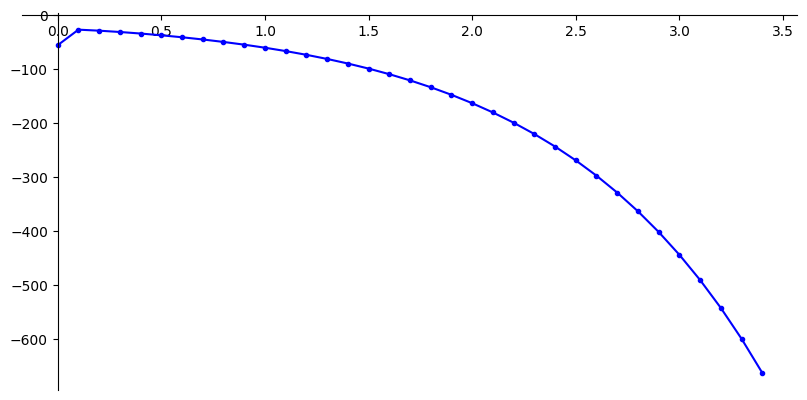

In [ ]:
x = Symbol('x')

e = round(np.e, 4)

c = lambda x: np.log(x) - 3 * (e ** (x + 2))
c_s = sympy.log(x) - 3 * (e ** (x + 2))

desenha_funcao(c)

In [ ]:
intervalo_c = (0.1, 1)

print(f"c) {c_s}\n")

raiz = bisseccao(c, intervalo_c, 0.0001, 100, 4, False)
print(f"Bissecção: {raiz}")
raiz = falsa_posicao(c, intervalo_c, 0.0001, 100, 4, False)
print(f"Falsa posição: {raiz}")
raiz = secante(c, 1.6, 2.5, 0.0001, 100, 4, False)
print(f"Secante: {raiz}")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


c) -3*2.7183**(x + 2) + log(x)

Bissecção: 1.0
Falsa posição: -0.2605
Secante: nan


Na letra **c)**, apesar dos métodos de bisseção e falsa posição atingirem resultados, a função não converge corretamente pois ela não intercepta o eixo X e não apresenta raízes.

## Exercício 2

<Figure size 432x288 with 0 Axes>

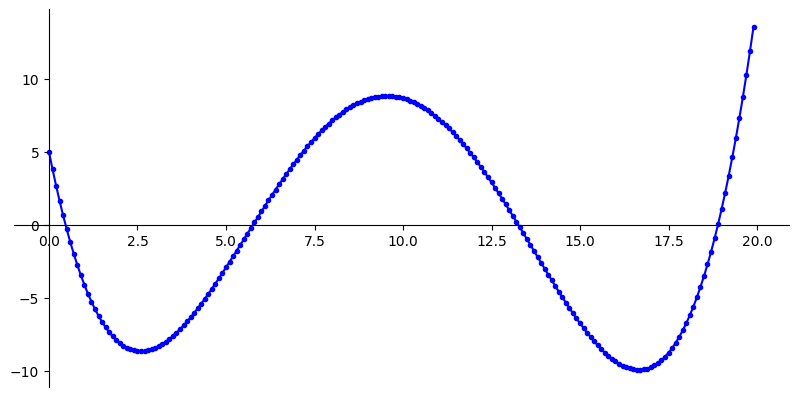

In [ ]:
x = Symbol('x')

f = lambda x: 0.0074 * (x ** 4) - 0.284 * (x ** 3) + 3.355 * (x ** 2) - 12.183 * x + 5
f_s =  0.0074 * (x ** 4) - 0.284 * (x ** 3) + 3.355 * (x ** 2) - 12.183 * x + 5

desenha_funcao(f, (0, 20))

In [ ]:
print(f"{f_s}\n")

raiz = newton_raphson(f_s, 16.15, 0.01, 100, 4)
print(f"\nNewton Raphsen: {raiz}")

0.0074*x**4 - 0.284*x**3 + 3.355*x**2 - 12.183*x + 5

n		x		f(x)		f'(x)
0		16.15		-9.5745		-1.3537
1		9.0772		8.6788		0.6625
2		-4.0229		128.7357		-54.8924
3		-1.6777		36.2824		-25.9782
4		-0.2811		8.6961		-14.1372
5		0.3340		1.2947		-10.0358
6		0.4630		0.0506		-9.2560
6		0.4685		-0.0002		--

Newton Raphsen: 0.4685


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.animation
import numpy as np

%matplotlib notebook
%matplotlib notebook

plt.clf()
plt.close()

valores = [
    [0, 16.15, -9.5745, -1.3537],
    [1, 9.0772, 8.6788, 0.6625],
    [2, -4.0229, 128.7357, -54.8924],
    [3, -1.6777, 36.2824, -25.9782],
    [4, -0.2811, 8.6961, -14.1372],
    [5, 0.3340, 1.2947, -10.0358],
    [6, 0.4630, 0.0506, -9.2560]
]

intervalo = (-5, 20)
a, b = intervalo

fig, ax = plt.subplots()

line, = ax.plot([], [], lw=2)

x = np.arange(a, b, 0.1)

ax.figure.set_size_inches(12, 6)

def animate(i):
    _, x0, fx, fdx = valores[i]

    func = lambda x: fdx * (x - x0) + fx
    
    plt.cla()

    # Desenha plano cartesiano
    ax.spines['top'].set_color('none')
    ax.spines['bottom'].set_position('zero')
    ax.spines['left'].set_position('zero')
    ax.spines['right'].set_color('none')

    plt.plot(x0, fx, 'ro')

    yf = [f(xi) for xi in x]
    plt.plot(x, yf, 'b-')

    y = [func(xi) for xi in x]
    plt.plot(x, y, 'y-')

    plt.text(15, 18, f"Iteração: {i + 1}", size="x-large")

    plt.ylim(-10,20)
    plt.xlim(-5,20)


ani = matplotlib.animation.FuncAnimation(fig, animate, frames=len(valores))

from IPython.display import HTML
HTML(ani.to_jshtml())

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Apesar do valor inicial 16,15 estar mais distante da raíz 0,4685 do que de outras raízes possíveis para a função, o algoritmo de Newton Raphson utiliza a derivada para calcular essa aproximação. Logo, esse método não considera necessariamente a proximidade do valor inicial para raiz, e sim as posições onde a derivada intercepta o eixo X em cada iteração.

No gráfico acima temos uma representação do processo de conversão do Newton Raphsen a partir dos valores obtidos na execução da função. A função original está apresentada em azul, a tangente obtida pela derivada em cada passo está apresentada em amarelo, e o ponto vermelho é o valor da solução parcial de X. Aqui podemos observar que as soluções parciais de X se distanciam do valor inicial 16,15 nas primeiras iterações, e começam a convergir para 0,4685 a partir da quarta iteração.

## Exercício 3

<Figure size 432x288 with 0 Axes>

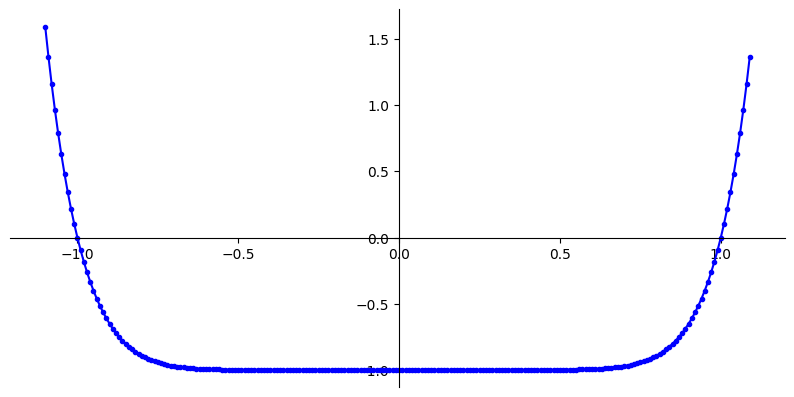

In [ ]:
%matplotlib inline

f = lambda x: x ** 10 - 1

desenha_funcao(f, (-1.1, 1.1), 0.01)

In [ ]:
intervalo_3 = (0, 1.3)

raiz = bisseccao(f, intervalo_3, 0.0001, 5, 4, False)
print(f"Bissecção: {raiz}")
raiz = falsa_posicao(f, intervalo_3, 0.0001, 5, 4, False)
print(f"Falsa posição: {raiz}")

Bissecção: 1.0156
Falsa posição: 0.4079


É possível observar que o método da bissecção converge mais rápido que o método da falsa posição, pois ele se aproximou mais da raiz positiva 1 em apenas 5 iterações, enquanto a falsa posição ainda precisaria de mais iterações para atingir um valor de raiz dentro da precisão especificada.

## Exercício 4

<Figure size 432x288 with 0 Axes>

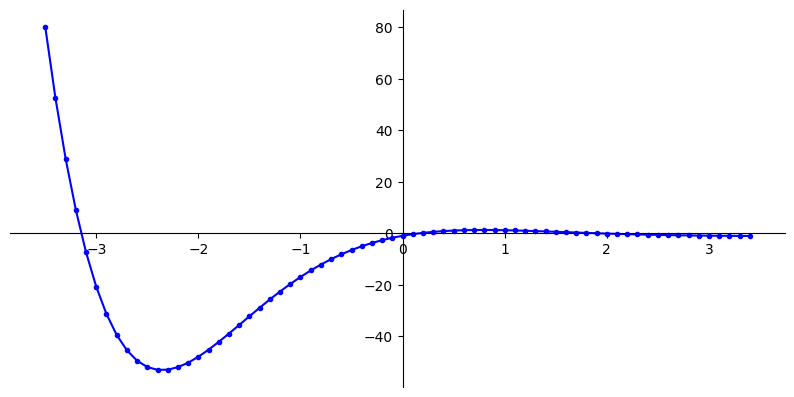

In [ ]:
x = Symbol('x')

f = lambda x: 7 * np.sin(x) * (np.e ** (x * -1)) - 1
f_s = 7 * sympy.sin(x) * (np.e ** (x * -1)) - 1

desenha_funcao(f)

In [ ]:
raiz = newton_raphson(f_s, 0.3, 0.0001, 3, 4, False)
print(f"Newton Raphsen: {raiz}")

raiz = secante(f, 0.5, 0.4, 0.0001, 3, 4, False)
print(f"Secante: {raiz}")

Newton Raphsen: 0.1702
Secante: 0.179


Como esperado, o método Newton-Raphsen converge mais rápido que o método da Secante e com apenas 3 iterações chega mais próximo do valor real da raiz da função (por volta de 0,1702). O método da Secante, apesar de exigir mais iterações para convergir, tem como vantagem não necessitar do cálculo da derivada da função.